# Settimana

In [1]:
import datetime

year = datetime.datetime.now().year

start_date = "2021-10-25"

end_date = "2021-10-31"

print("Settimana dal " + start_date + " al " + end_date)

Settimana dal 2021-10-25 al 2021-10-31


# Biblioteche

In [2]:
import pandas as pd

dfLBR = pd.read_csv("csv" + "/" + "biblioteche.csv", sep = "\t")

dfLBR.sort_values(by = ["sigla"], inplace = True)

# Posti a sedere

In [3]:
import datetime
import pandas as pd

def settimana(giorno):
    if pd.isna(giorno) or type(giorno) == str:
        return 0
    return giorno.isocalendar()[1]

print("BSGU", end =" ")

dfBSGU = pd.read_excel("tmp" + "/" + "BSGU2021.xlsx")

dfBSGU["Biblioteca"] = "BSGU"

df = dfBSGU

for index, row in dfLBR.iterrows():
    if row["sigla"] != "BSGU":
        print(row["sigla"], end = " ")
        dfTMP00 = pd.read_excel("tmp" + "/" + row["sigla"] + "2021.xlsx")
        dfTMP00["Biblioteca"] = row["sigla"]
        df = df.append(dfTMP00, ignore_index = True)

df["Settimana"] = df.apply(lambda x: settimana(x["Giorno"]), axis = 1)

s = df.groupby(["Biblioteca", "Settimana"])["Posti"].max()

dfTMP = s.to_frame(name = "Posti")

dfTMP.reset_index(inplace = True)

dfTMP.to_csv("csv" + "/" + "posti_a_sedere.csv", sep = "\t", index = False)

BSGU Agraria Arte BICF Biomedica Filosofia Lingue Malliani Matematica Mediazione Medicina SAFM San Paolo Scienze della Terra Scienze politiche Storia Veterinaria 

# Orari di apertura

In [4]:
import datetime
import pandas as pd

def settimana(giorno):
    if pd.isna(giorno) or type(giorno) == str:
        return 0
    return giorno.isocalendar()[1]

def inizio(orario):
    posizione = orario.find('-')
    if posizione != -1:
        inizio = orario[0: posizione]
        inizio = inizio.replace(':', '.')
        inizio = inizio.replace('.15', '.25')
        inizio = inizio.replace('.30', '.50')
        inizio = inizio.replace('.45', '.75')
        return float(inizio)
    return 0
    
def fine(orario):
    posizione = orario.rfind('-')
    if posizione != -1:
        fine = orario[posizione + 1:]
        fine = fine.replace(':', '.')
        fine = fine.replace('.15', '.25')
        fine = fine.replace('.30', '.50')
        fine = fine.replace('.45', '.75')
        return float(fine)
    return 0 

print("BSGU", end =" ")

dfBSGU = pd.read_excel("tmp" + "/" + "BSGU2021.xlsx")

dfBSGU["Biblioteca"] = "BSGU"

df = dfBSGU

for index, row in dfLBR.iterrows():
    if row["sigla"] != "BSGU":
        print(row["sigla"], end = " ")
        dfTMP00 = pd.read_excel("tmp" + "/" + row["sigla"] + "2021.xlsx")
        dfTMP00["Biblioteca"] = row["sigla"]
        df = df.append(dfTMP00, ignore_index = True)

df["Settimana"] = df.apply(lambda x: settimana(x["Giorno"]), axis = 1)

s = df.groupby(["Biblioteca", "Settimana"])['Orario'].max()

dfTMP = s.to_frame(name = "Orario")

dfTMP.reset_index(inplace = True)

dfTMP['inizio'] = dfTMP.apply(lambda x: inizio(x['Orario']), axis = 1)

dfTMP['fine'] = dfTMP.apply(lambda x: fine(x['Orario']), axis = 1)

dfTMP.to_csv("csv" + "/" + "orari_di_apertura.csv", sep = "\t", index = False)

BSGU Agraria Arte BICF Biomedica Filosofia Lingue Malliani Matematica Mediazione Medicina SAFM San Paolo Scienze della Terra Scienze politiche Storia Veterinaria 

# Dataset

In [5]:
import numpy as np
import pandas as pd

def ore_di_apertura(orario):
    if orario[0:1] == '9':
        orario = '0' + orario 
    if len(orario) == 11:
        orario = orario.replace(":", ".")
        orario = orario.replace(",", ".")
        orario = orario.replace(".15", ".25")
        orario = orario.replace(".30", ".50")
        orario = orario.replace(".45", ".75")
        return float(orario[6:]) - float(orario[0:5])
    return 0

def posti_occupati_massimo(value1, value2, value3, value4, value5):
    return max(value1, value2, value3, value4, value5)

def posti_occupati_media(values, value5):
    new_values = []
    if value5 != 0:
        return value5
    else:
        for value in values:
            if value != 0:
                new_values.append(value)
            if len(new_values) != 0:
                return sum(new_values) / len(new_values)
    return 0

def rilevazioni(value1, value2, value3, value4, value5):
    if value1 == 0:
        rilevazioni = 0
    else:
        rilevazioni = 1
    if value2 == 0:
        rilevazioni = rilevazioni
    else:
        rilevazioni = 1
    if value3 == 0:
        rilevazioni = rilevazioni
    else:
        rilevazioni = rilevazioni + 1
    if value4 == 0:
        rilevazioni = rilevazioni
    else:
        rilevazioni = rilevazioni + 1
    if value5 == 0:
        rilevazioni = rilevazioni
    else:
        rilevazioni = rilevazioni + 1
    return rilevazioni

dfBSGU = pd.read_excel("tmp" + "/" + "BSGU2021.xlsx")

dfBSGU["Biblioteca"] = "BSGU"

dfBSGU["Posti occupati (picco settimanale)"] = dfBSGU.apply(lambda x: posti_occupati_massimo(x["09.00-12.00"],
    x["12.00-14.00"], x["14.00-16.00"], x["16.00-18.00"], x["Picco"]), axis = 1)

dfBSGU["Posti occupati (media)"] = dfBSGU.apply(lambda x: posti_occupati_media([x["09.00-12.00"],
    x["12.00-14.00"], x["14.00-16.00"], x["16.00-18.00"]], x["Picco"]), axis = 1)

dfBSGU["Rilevazioni"] = dfBSGU.apply(lambda x: rilevazioni(x["09.00-12.00"],
    x["12.00-14.00"], x["14.00-16.00"], x["16.00-18.00"], x["Picco"]), axis = 1)

df = dfBSGU[(dfBSGU["Giorno"] >= start_date) & (dfBSGU["Giorno"] <= end_date)]

for index, row in dfLBR.iterrows():
    if row["sigla"] != "BSGU":
        print(row["sigla"], end = " ")
        dfTMP00 = pd.read_excel("tmp" + "/" + row["sigla"] + "2021.xlsx")
        dfTMP00["Biblioteca"] = row["sigla"]
        dfTMP00["Posti occupati (picco settimanale)"] = dfTMP00.apply(lambda x: posti_occupati_massimo(x["09.00-12.00"],
            x["12.00-14.00"], x["14.00-16.00"], x["16.00-18.00"], x["Picco"]), axis = 1)
        dfTMP00["Posti occupati (media)"] = dfTMP00.apply(lambda x: posti_occupati_media([x["09.00-12.00"],
            x["12.00-14.00"], x["14.00-16.00"], x["16.00-18.00"]], x["Picco"]), axis = 1)
        dfTMP00["Rilevazioni"] = dfTMP00.apply(lambda x: rilevazioni(x["09.00-12.00"],
    x["12.00-14.00"], x["14.00-16.00"], x["16.00-18.00"], x["Picco"]), axis = 1)
        dfTMP01 = dfTMP00[(dfTMP00["Giorno"] >= start_date) &
            (dfTMP00["Giorno"] <= end_date)]
        df = df.append(dfTMP01, ignore_index = True)
        
df['Ore di apertura'] = df.apply(lambda x: ore_di_apertura(x['Orario']), axis = 1)

Agraria Arte BICF Biomedica Filosofia Lingue Malliani Matematica Mediazione Medicina SAFM San Paolo Scienze della Terra Scienze politiche Storia Veterinaria 

# Presenze settimanali

In [6]:
import etichette

def posti_disponibili(posti, presenze):
    return posti - presenze

s = df[df["Posti"] != 0].groupby(["Biblioteca"])["Posti occupati (picco settimanale)"].max()

dfTMP00 = s.to_frame(name = "Posti occupati (picco settimanale)")

dfTMP00.reset_index(inplace = True)

dfTMP00["Etichetta"] = dfTMP00.apply(lambda x: etichette.etichetta(x["Biblioteca"]), axis = 1)

dfTMP00.sort_values(by = ["Etichetta"], inplace = True)

s = df[df["Posti"] != 0].groupby(["Biblioteca"])["Posti occupati (media)"].mean()

dfTMP01 = s.to_frame(name = "Posti occupati (media)")

dfTMP01.reset_index(inplace = True)

dfTMP01["Etichetta"] = dfTMP01.apply(lambda x: etichette.etichetta(x["Biblioteca"]), axis = 1)

dfTMP01.sort_values(by = ["Etichetta"], inplace = True)

s = df[df["Posti"] != 0].groupby(["Biblioteca"])["Posti"].max()

dfTMP02 = s.to_frame(name = "Posti")

dfTMP02.reset_index(inplace = True)

dfTMP02["Etichetta"] = dfTMP02.apply(lambda x: etichette.etichetta(x["Biblioteca"]), axis = 1)

dfTMP02.sort_values(by = ["Etichetta"], inplace = True)

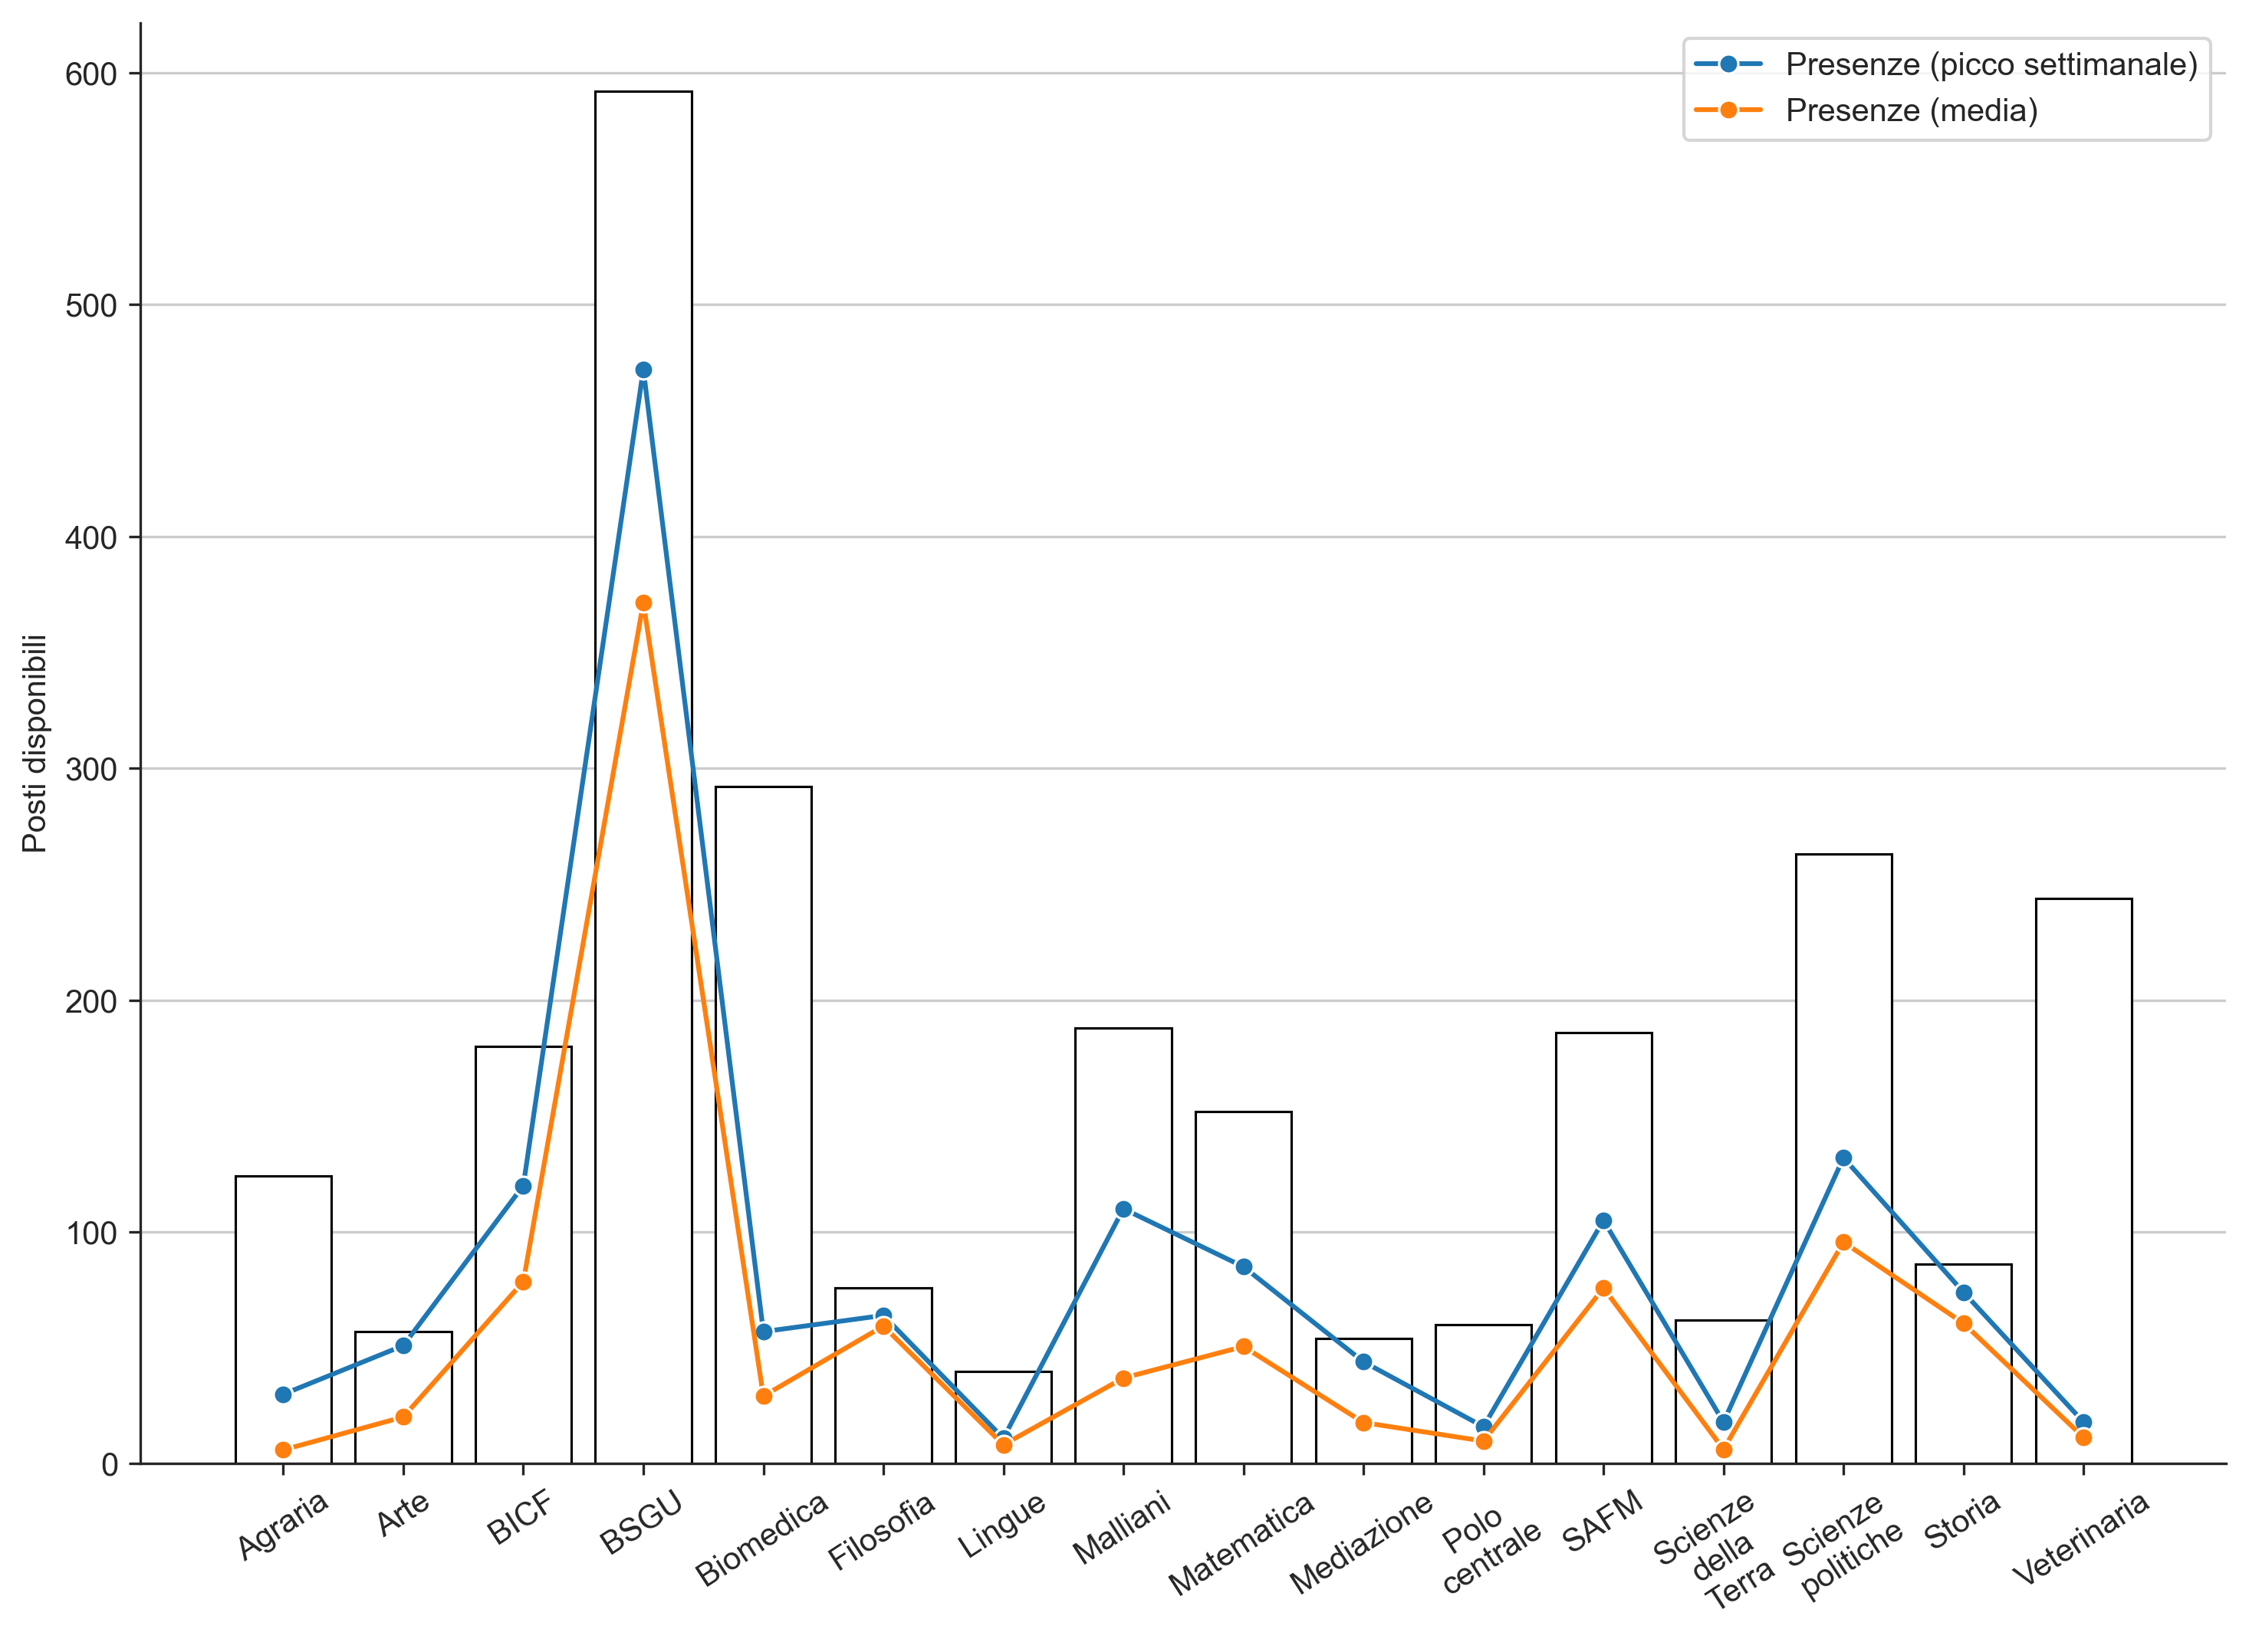

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (11.7, 8.3), dpi = 300)
sns.set_style("ticks")

sns.barplot(data = dfTMP02, x = "Etichetta", y = "Posti" , errwidth = 0.0, facecolor = "white", edgecolor = "black", linewidth = 0.75)

sns.lineplot(data = dfTMP00, x = "Etichetta", y = "Posti occupati (picco settimanale)",
    marker = "o", label = "Presenze (picco settimanale)")

sns.lineplot(data = dfTMP01, x = "Etichetta", y = "Posti occupati (media)",
    marker = "o", label = "Presenze (media)")

sns.despine(right = True)
plt.grid(b = None, which = "both", axis = "y")
plt.xticks(rotation = 33, fontsize = 10)
plt.xlabel("")
plt.ylabel("Posti disponibili")
plt.savefig("pdf" + "/" + "Presenze " + start_date + " " + end_date + ".jpg", dpi = 300)
plt.show()

# Tabella

In [8]:
def biblioteca(biblioteca):
    if biblioteca == "Medicina":
        return "Polo centrale"
    return biblioteca

dfTMP10 = dfTMP00[["Biblioteca", "Posti occupati (picco settimanale)"]]

dfTMP11 = dfTMP01[["Biblioteca", "Posti occupati (media)"]]

dfTMP12 = dfTMP02[["Biblioteca", "Posti"]]

dfTMP20 = dfTMP10.merge(dfTMP11, on = ["Biblioteca"])

dfTMP21 = dfTMP20.merge(dfTMP12, on = ["Biblioteca"])

dfTMP21 = dfTMP21[["Biblioteca", "Posti", "Posti occupati (media)", "Posti occupati (picco settimanale)"]]

dfTMP21["Biblioteca"] = dfTMP21.apply(lambda x: biblioteca(x["Biblioteca"]), axis = 1)

dfTMP21.to_excel("pdf" + "/" + "Presenze " + start_date + " " + end_date + ".xlsx", index = False)

# Documento

In [9]:
from shutil import copyfile

copyfile("pdf" + "/" + "Archivio" + "/" + "PresenzeSBA.docx", "pdf" + "/" + "Presenze" + "_" + start_date + "_" + end_date + ".docx")

'pdf/Presenze_2021-10-25_2021-10-31.docx'